In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = 'retina'

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import logging
logging.basicConfig(level=logging.INFO)

In [3]:
from src.parameters import ANIMALS

epoch_key = ('jaq', 1, 2)

In [59]:
from loren_frank_data_processing import make_tetrode_dataframe

tetrode_info = (make_tetrode_dataframe(ANIMALS)
                .xs(epoch_key, drop_level=False))

tetrode_info = tetrode_info.loc[tetrode_info.area == 'ca1']
tetrode_info

area  clockrate  deadchans depth      endtime  \
animal day epoch tetrode_number                                                 
jaq    1   2     1               ca1      30000        NaN    []  4655.752867   
                 2               ca1      30000        NaN    []  4655.752867   
                 3               ca1      30000        NaN    []  4655.752867   
                 4               ca1      30000        NaN    []  4655.752867   
                 5               ca1      30000        NaN    []  4655.752867   
                 6               ca1      30000        NaN    []  4655.752867   
                 7               ca1      30000        NaN    []  4655.752867   
                 8               ca1      30000        NaN    []  4655.752867   
                 9               ca1      30000        NaN    []  4655.752867   
                 10              ca1      30000        NaN    []  4655.752867   
                 11              ca1      30000        NaN    []  4655.752867   
                 12              ca1      30000        NaN    []  4655.752867   
                 14              ca1      30000        NaN    []  4655.752867   
                 15              ca1      30000        NaN    []  4655.752867   
                 16              ca1      30000        NaN    []  4655.752867   
                 17              ca1      30000        NaN    []  4655.752867   
                 18              ca1      30000        NaN    []  4655.752867   
                 20              ca1      30000        NaN    []  4655.752867   
                 21              ca1      30000        NaN    []  4655.752867   
                 22              ca1      30000        NaN    []  4655.752867   
                 23              ca1      30000        NaN    []  4655.752867   
                 24              ca1      30000        NaN    []  4655.752867   
                 25              ca1      30000        NaN    []  4655.752867   
                 27              ca1      30000        NaN    []  4655.752867   
                 28              ca1      30000        NaN    []  4655.752867   
                 29              ca1      30000        NaN    []  4655.752867   
                 30              ca1      30000        NaN    []  4655.752867   

                                 nTrode  nTrodeChannel  numcells   ref  \
animal day epoch tetrode_number                                          
jaq    1   2     1                    1              1         0  13.0   
                 2                    2              1         0  13.0   
                 3                    3              1         0  13.0   
                 4                    4              1         0  13.0   
                 5                    5              1         0  13.0   
                 6                    6              1         0  13.0   
                 7                    7              1         0  13.0   
                 8                    8              1         0  13.0   
                 9                    9              1         0  13.0   
                 10                  10              1         0  13.0   
                 11                  11              1         0  13.0   
                 12                  12              1         0  13.0   
                 14                  14              1         0  13.0   
                 15                  15              1         0  13.0   
                 16                  16              1         0  13.0   
                 17                  17              1         0  13.0   
                 18                  18              1         0  13.0   
                 20                  20              1         0  13.0   
                 21                  21              1         0  13.0   
                 22                  22              1         0  13.0   
                 23                  23              1

In [86]:
from loren_frank_data_processing import get_all_multiunit_indicators

tetrode_keys = tetrode_info.index
multiunits = get_all_multiunit_indicators(tetrode_keys, ANIMALS)
multiunits

KeyboardInterrupt: 

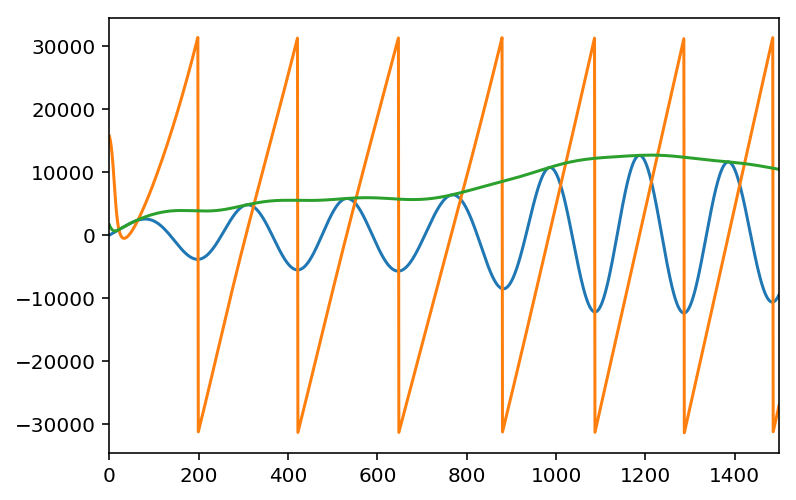

In [45]:
from src.load_data import get_filter_filename
from scipy.io import loadmat
import pandas as pd

tetrode_key = ('jaq', 1, 2, 1)
animals = ANIMALS
freq_band='theta'

filter_file = loadmat(
    get_filter_filename(tetrode_key, animals, freq_band))
filter_data = filter_file[freq_band][0, -1][0, -1][0, -1][0]
COLUMNS = ['bandpassed_lfp', 'instantaneous_phase', 'envelope_magnitude']
df = pd.DataFrame(filter_data['data'][0], columns=COLUMNS)

df.iloc[:1500, 0].plot()
df.iloc[:1500, 1].plot()
df.iloc[:1500, 2].plot()

In [56]:
from loren_frank_data_processing.core import reconstruct_time

time = reconstruct_time(
    filter_data['starttime'][0][0][0],
    filter_data['data'][0].shape[0],
    float(filter_data['samprate'][0][0][0]))

In [58]:
from src.load_data import get_filter

get_filter(tetrode_key, ANIMALS)

,bandpassed_lfp,instantaneous_phase,envelope_magnitude
time,,,
00:40:04.732866,0,15709,1623
00:40:04.733533,41,15422,1441
00:40:04.734200,83,15063,1281
00:40:04.734866,124,14636,1160
00:40:04.735533,165,14120,1046
...,...,...,...
01:17:35.750200,678,13142,2672
01:17:35.750866,508,13691,2533
01:17:35.751533,336,14280,2363


In [63]:

tetrode_info = (make_tetrode_dataframe(ANIMALS)
                .xs(epoch_key, drop_level=False))
tetrode_info.loc[tetrode_info.area == 'cc'].index[0]

MultiIndex([('jaq', 1, 2, 13),
            ('jaq', 1, 2, 19)],
           names=['animal', 'day', 'epoch', 'tetrode_number'])

In [72]:
tetrode_info.reset_index().tetrode_number == tetrode_info.ref.dropna().unique()

ValueError: Lengths must match to compare

In [84]:
is_ref = (tetrode_info.reset_index()
          .tetrode_number.isin(tetrode_info.ref.dropna().unique())).values
ref_tetrode_key = tetrode_info.loc[is_ref].index[0]
theta_df = get_filter(ref_tetrode_key, ANIMALS, freq_band='theta')

In [85]:
theta_df

,bandpassed_lfp,instantaneous_phase,envelope_magnitude
time,,,
00:40:04.732866,0,0,0
00:40:04.733533,0,0,0
00:40:04.734200,0,0,0
00:40:04.734866,0,0,0
00:40:04.735533,0,0,0
...,...,...,...
01:17:35.750200,0,0,0
01:17:35.750866,0,0,0
01:17:35.751533,0,0,0


In [87]:
from src.load_data import get_interpolated_position_info

position_info = get_interpolated_position_info(epoch_key, ANIMALS)

In [94]:
position_info

,x_position,y_position,head_direction,speed,linear_distance,track_segment_id,linear_position
time,,,,,,,
00:43:30.546587,28.574616,50.447565,-0.524582,27.167580,55.166435,0.0,241.577308
00:43:30.548587,28.620635,50.416210,-0.522722,27.038446,55.111752,0.0,241.522625
00:43:30.550587,28.666655,50.384854,-0.520861,26.909312,55.057070,0.0,241.467942
00:43:30.552587,28.712674,50.353498,-0.519001,26.780177,55.002387,0.0,241.413260
00:43:30.554587,28.758693,50.322143,-0.517140,26.651043,54.947704,0.0,241.358577
...,...,...,...,...,...,...,...
01:17:35.746587,4.403802,28.534400,-2.917781,2.868040,34.784349,5.0,52.699586
01:17:35.748587,4.405093,28.526955,-2.910619,2.929845,34.782839,5.0,52.698076
01:17:35.750587,4.406384,28.519511,-2.903458,2.991649,34.781329,5.0,52.696566


In [95]:
    is_ref = (tetrode_info.reset_index()
              .tetrode_number.isin(tetrode_info.ref.dropna().unique())).values
    ref_tetrode_key = tetrode_info.loc[is_ref].index[0]
    theta_df = get_filter(ref_tetrode_key, ANIMALS, freq_band='theta')

In [96]:
theta_df

,bandpassed_lfp,instantaneous_phase,envelope_magnitude
time,,,
00:40:04.732866,0,0,0
00:40:04.733533,0,0,0
00:40:04.734200,0,0,0
00:40:04.734866,0,0,0
00:40:04.735533,0,0,0
...,...,...,...
01:17:35.750200,0,0,0
01:17:35.750866,0,0,0
01:17:35.751533,0,0,0


In [97]:
ref_tetrode_key

('jaq', 1, 2, 13)

In [98]:
from src.load_data import get_filter

tetrode_key = ('jaq', 1, 2, 1)
theta_df = get_filter(tetrode_key, ANIMALS, freq_band='theta')

In [99]:
theta_df

,bandpassed_lfp,instantaneous_phase,envelope_magnitude
time,,,
00:40:04.732866,0,15709,1623
00:40:04.733533,41,15422,1441
00:40:04.734200,83,15063,1281
00:40:04.734866,124,14636,1160
00:40:04.735533,165,14120,1046
...,...,...,...
01:17:35.750200,678,13142,2672
01:17:35.750866,508,13691,2533
01:17:35.751533,336,14280,2363
